In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
df_fair = sm.datasets.fair.load_pandas().data

In [4]:
formula = 'affairs ~ C(rate_marriage) + C(rate_marriage):C(religious)'
df = df_fair
res_nr = smf.ols(formula, df).fit()
res_hc1 = smf.ols(formula, df).fit(cov_type='HC1')
res_hc3 = smf.ols(formula, df).fit(cov_type='HC3')

Text(0.5, 1.0, 'P-Values')

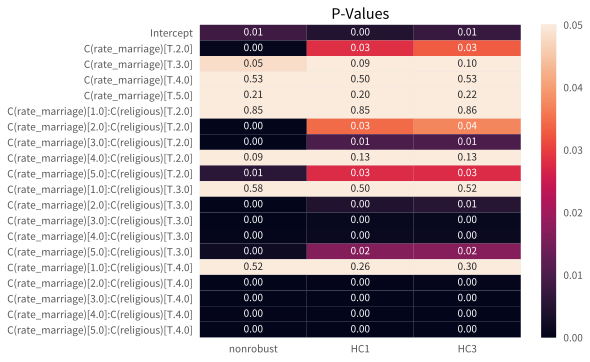

In [5]:
pvalues_nr = res_nr.pvalues
pvalues_hc1 = res_hc1.pvalues
pvalues_hc3 = res_hc3.pvalues

df = (
    pvalues_nr.to_frame('nonrobust')
    .join(pvalues_hc1.to_frame('HC1'))
    .join(pvalues_hc3.to_frame('HC3'))
)

sns.heatmap(df, vmin=0.00, vmax=0.05, annot=True, fmt='.2f')
plt.title('P-Values')